In [113]:
import pandas as pd

loan = pd.read_csv("loan.csv", low_memory=False)

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [116]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [118]:
percent_missing = loan.isnull().sum() * 100 / len(loan)
percent_missing

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [119]:
mis_columns=loan.columns[percent_missing>90]
loan[mis_columns].isnull().sum()

mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717


In [120]:
df=loan.drop(mis_columns,axis=1)

In [121]:
df.shape

(39717, 55)

In [122]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [123]:
df.isnull().sum() * 100 / len(df)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [124]:
df= df.drop(['desc'],axis=1)

In [125]:
df.isnull().sum() * 100 / len(df)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [126]:
df=df.drop(df[df.isnull().sum(axis=1)>5].index,axis=0)

In [127]:
df.isnull().sum() * 100 / len(df)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.186579
emp_length                     2.706786
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
title                          0.027697
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39715 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39715 non-null  int64  
 1   member_id                   39715 non-null  int64  
 2   loan_amnt                   39715 non-null  int64  
 3   funded_amnt                 39715 non-null  int64  
 4   funded_amnt_inv             39715 non-null  float64
 5   term                        39715 non-null  object 
 6   int_rate                    39715 non-null  object 
 7   installment                 39715 non-null  float64
 8   grade                       39715 non-null  object 
 9   sub_grade                   39715 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38640 non-null  object 
 12  home_ownership              39715 non-null  object 
 13  annual_inc                  397

In [129]:
# Lets remove percent '%' from int_rate column
df['int_rate']=df['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [130]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [131]:

df['emp_length'].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [132]:
#remove null values from emp_length column
df=df[~df['emp_length'].isnull()]

In [133]:
#change emp_length column to integer by extracting all integer value from string
import re
df['emp_length']=df['emp_length'].apply(lambda x: re.findall('\d+',str(x))[0])

In [134]:
df['emp_length'].head()


0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: object

In [135]:
df['loan_status'].value_counts()

Fully Paid     32143
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [136]:
#change remove current records as they are not necessary
df1=df[df['loan_status']!='Current']

In [137]:
#change loan_status into 0 and 1 
df1['loan_status']=df1['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [138]:
df1['loan_status']=df1['loan_status'].apply(lambda x: pd.to_numeric(x))

In [139]:
df1['loan_status'].head()

0    0
1    1
2    0
3    0
5    0
Name: loan_status, dtype: int64

In [140]:
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      1406
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            10
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq      

In [141]:
# Check for duplicate rows in dataset based on id column

print(df1.duplicated(subset=None, keep='first').count())
dup=df1[df1.duplicated(['id'])]
dup
 # there are no duplicates

37542


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [142]:
# Drop almost null column values and which are not needed
columns_drop = ["emp_title","mths_since_last_delinq","url","member_id","tax_liens"]
df1.drop(labels = columns_drop, axis =1, inplace=True)
columns_drop = ["zip_code"]
df1.drop(labels = columns_drop, axis =1, inplace=True)

In [143]:
df1.isnull().sum()

id                              0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
title                          10
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                     47
total_acc                       0
initial_list_status             0
out_prncp     

In [144]:
df1.shape

(37542, 48)

In [145]:
df1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,...,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [146]:

# Fill pub_rec_bankruptcies for na values with 'Not Known'
df1.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

In [147]:
# lets remove % sign again from revol_util
df1['revol_util'] = df1['revol_util'].str.rstrip('%')
df1['revol_util'].head()

0    83.70
1     9.40
2    98.50
3       21
5    28.30
Name: revol_util, dtype: object

In [148]:
# convert amount columns into numeric

cols1 = ['funded_amnt_inv','loan_amnt','funded_amnt','total_pymnt','int_rate','installment','annual_inc','dti','emp_length']
df1[cols1] = df1[cols1].apply(pd.to_numeric)

In [149]:
(df1.loan_status.value_counts()*100)/len(df1)
# Observations
# 85.61 percent loans were fully paid.
# Close to 14% loans were charged off

0    85.618774
1    14.381226
Name: loan_status, dtype: float64

In [150]:
#Univariate Analysis ->  Quantitative Variables
#This is the laon_amnt applied where we get min amount ,max amount ,mean etc
df1['loan_amnt'].describe()

count    37542.000000
mean     11119.741223
std       7354.077697
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [151]:
# This is the total amount funded with mean,min,max
df1['total_pymnt'].describe()


count    37542.000000
mean     11957.439653
std       8823.974676
min          0.000000
25%       5565.390132
50%       9780.554903
75%      16244.793990
max      58563.679930
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

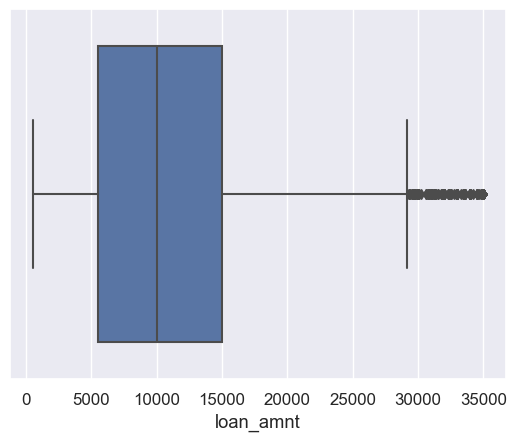

In [152]:
#The loan amount goes from 0 with minimun and with 25percentile starts from around 5000 to goes to 15000 around 75percentile
# We can see the outliers where whose amount is greater 30000
sns.boxplot(df1.loan_amnt)


<AxesSubplot:xlabel='total_pymnt'>

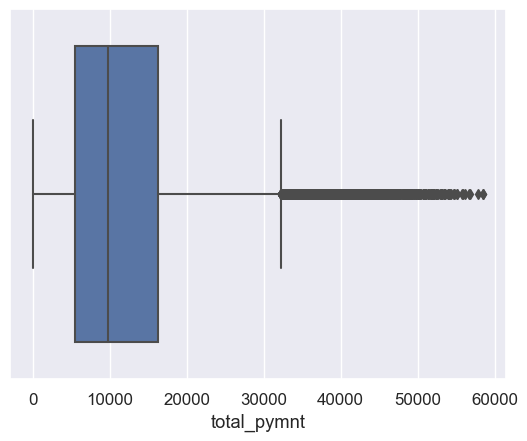

In [153]:
sns.boxplot(df1.total_pymnt)

In [154]:
df1['int_rate'].describe()

count    37542.000000
mean        11.963467
std          3.683052
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

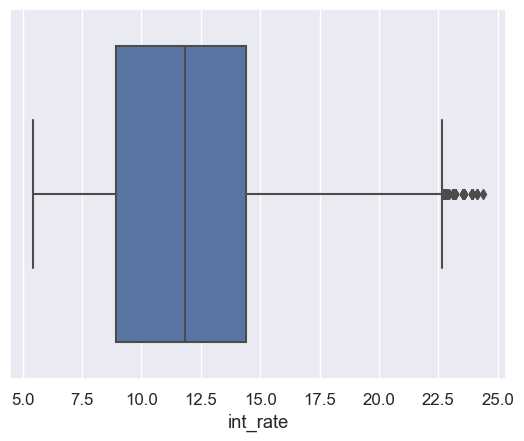

In [155]:
sns.boxplot(df1.int_rate)

In [156]:
#Derive Columns For Analysis
df1.issue_d = pd.to_datetime(df1.issue_d, format='%b-%y')
df1['year']=df1['issue_d'].dt.year
df1['month']=df1['issue_d'].dt.month

df1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,...,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12


In [157]:
df1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,...,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12


In [158]:
loan2 = pd.read_csv("loan.csv", low_memory=False)
loan2.iloc[:, 53:105].columns

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_pa

In [159]:
df1.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'year', 'month'],
      dtype='object')

In [160]:
# remove more unrequired columns
columns_drop = ["acc_now_delinq","chargeoff_within_12_mths","delinq_amnt"]
df1.drop(labels = columns_drop, axis =1, inplace=True)

In [161]:
# remove outliers
df1['annual_inc'].describe()
df1 = df1[df1["annual_inc"] < df1["annual_inc"].quantile(0.99)]

In [162]:
df1['annual_inc'].describe()

count     37163.000000
mean      65900.697047
std       35152.744305
min        4000.000000
25%       40905.000000
50%       59000.000000
75%       81600.000000
max      234996.000000
Name: annual_inc, dtype: float64

In [163]:
df1.shape

(37163, 47)

In [164]:
df1=df1.dropna()

In [165]:
df1.collections_12_mths_ex_med.fillna('0',inplace=True)
loan_correlation = df1.corr()
loan_correlation

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,year,month
id,1.000000,0.120877,0.131756,0.232399,0.055822,0.075439,0.107158,0.037159,0.042892,0.088055,...,0.092153,0.123943,-0.056757,0.039989,-0.010049,0.142743,NaN,NaN,0.846311,0.386896
loan_amnt,0.120877,1.000000,0.981548,0.937034,0.297676,0.930931,0.148096,0.412909,0.066638,0.070118,...,0.844492,0.727796,0.048191,0.144033,0.076120,0.472043,NaN,NaN,0.110174,0.053472
funded_amnt,0.131756,0.981548,1.000000,0.955585,0.302000,0.957138,0.147611,0.408265,0.063457,0.069766,...,0.863024,0.736220,0.050583,0.144766,0.077967,0.476456,NaN,NaN,0.121581,0.043036
funded_amnt_inv,0.232399,0.937034,0.955585,1.000000,0.294980,0.903741,0.158758,0.391452,0.044553,0.077507,...,0.836574,0.725464,0.029622,0.133052,0.064428,0.467133,NaN,NaN,0.253734,0.069917
int_rate,0.055822,0.297676,0.302000,0.294980,1.000000,0.273944,-0.000167,0.065229,0.212933,0.115165,...,0.171541,0.522185,0.095781,0.129843,0.070298,0.171778,NaN,NaN,0.040286,0.027102
installment,0.075439,0.930931,0.957138,0.903741,0.273944,1.000000,0.120081,0.409380,0.032914,0.059744,...,0.846613,0.640597,0.058908,0.122211,0.076506,0.410350,NaN,NaN,0.052182,0.030515
emp_length,0.107158,0.148096,0.147611,0.158758,-0.000167,0.120081,1.000000,0.173417,0.018368,0.051118,...,0.121826,0.116465,-0.016246,0.026952,0.006502,0.083991,NaN,NaN,0.113750,0.023090
annual_inc,0.037159,0.412909,0.408265,0.391452,0.065229,0.409380,0.173417,1.000000,-0.058863,-0.111530,...,0.392893,0.280294,0.014099,0.040239,0.023205,0.222737,NaN,NaN,0.042513,0.015001
loan_status,0.042892,0.066638,0.063457,0.044553,0.212933,0.032914,0.018368,-0.058863,1.000000,0.042734,...,-0.331776,0.019986,0.168964,0.341085,0.205106,-0.220503,NaN,NaN,0.023846,0.026144
dti,0.088055,0.070118,0.069766,0.077507,0.115165,0.059744,0.051118,-0.111530,0.042734,1.000000,...,0.044327,0.109655,-0.011324,0.025705,0.011814,0.014056,NaN,NaN,0.089802,0.013088


In [166]:
df1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0,2011,12
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0,2011,12
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,...,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0.0,2011,12


In [167]:
df1.emp_length.fillna('0',inplace=True)

In [168]:
df1.dtypes

id                                     int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                             int64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                            int64
pymnt_plan                            object
purpose                               object
title                                 object
addr_state                            object
dti                                  float64
delinq_2yrs                            int64
earliest_cr_line                      object
inq_last_6

In [169]:
# Drop additional columns which are not needed further in analysis.
columns_drop = ["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
df1.drop(labels = columns_drop, axis =1, inplace=True)

In [170]:
df1['collections_12_mths_ex_med']=df1['collections_12_mths_ex_med'].apply(lambda x: pd.to_numeric(x))
loan_correlation = df1.corr()
loan_correlation

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,year,month
id,1.000000,0.120877,0.131756,0.232399,0.055822,0.107158,0.037159,0.042892,0.088055,-0.008745,...,0.194807,0.092153,0.123943,-0.056757,0.039989,-0.010049,0.142743,NaN,0.846311,0.386896
loan_amnt,0.120877,1.000000,0.981548,0.937034,0.297676,0.148096,0.412909,0.066638,0.070118,-0.037065,...,0.846432,0.844492,0.727796,0.048191,0.144033,0.076120,0.472043,NaN,0.110174,0.053472
funded_amnt,0.131756,0.981548,1.000000,0.955585,0.302000,0.147611,0.408265,0.063457,0.069766,-0.036911,...,0.863633,0.863024,0.736220,0.050583,0.144766,0.077967,0.476456,NaN,0.121581,0.043036
funded_amnt_inv,0.232399,0.937034,0.955585,1.000000,0.294980,0.158758,0.391452,0.044553,0.077507,-0.043236,...,0.908666,0.836574,0.725464,0.029622,0.133052,0.064428,0.467133,NaN,0.253734,0.069917
int_rate,0.055822,0.297676,0.302000,0.294980,1.000000,-0.000167,0.065229,0.212933,0.115165,0.156716,...,0.283042,0.171541,0.522185,0.095781,0.129843,0.070298,0.171778,NaN,0.040286,0.027102
emp_length,0.107158,0.148096,0.147611,0.158758,-0.000167,1.000000,0.173417,0.018368,0.051118,0.014636,...,0.141149,0.121826,0.116465,-0.016246,0.026952,0.006502,0.083991,NaN,0.113750,0.023090
annual_inc,0.037159,0.412909,0.408265,0.391452,0.065229,0.173417,1.000000,-0.058863,-0.111530,0.025490,...,0.377807,0.392893,0.280294,0.014099,0.040239,0.023205,0.222737,NaN,0.042513,0.015001
loan_status,0.042892,0.066638,0.063457,0.044553,0.212933,0.018368,-0.058863,1.000000,0.042734,0.019171,...,-0.228407,-0.331776,0.019986,0.168964,0.341085,0.205106,-0.220503,NaN,0.023846,0.026144
dti,0.088055,0.070118,0.069766,0.077507,0.115165,0.051118,-0.111530,0.042734,1.000000,-0.033213,...,0.073539,0.044327,0.109655,-0.011324,0.025705,0.011814,0.014056,NaN,0.089802,0.013088
delinq_2yrs,-0.008745,-0.037065,-0.036911,-0.043236,0.156716,0.014636,0.025490,0.019171,-0.033213,1.000000,...,-0.034939,-0.043421,0.019061,0.029209,0.012205,0.013313,-0.016479,NaN,-0.003289,-0.011243


In [171]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
df1['loan_amnt_cats'] = pd.cut(df1['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df1['annual_inc_cats'] = pd.cut(df1['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df1['int_rate_cats'] = pd.cut(df1['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
df1['dti_cats'] = pd.cut(df1['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

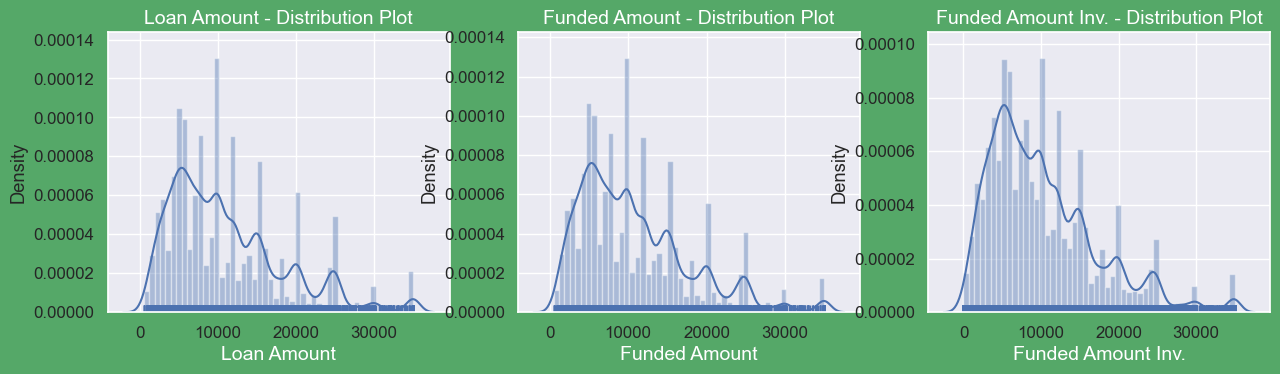

In [172]:
#Univariate Analysis -

plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("darkgrid")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(df1['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(df1['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(df1['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.
# We will work with only loan amount column for rest of our analysis.

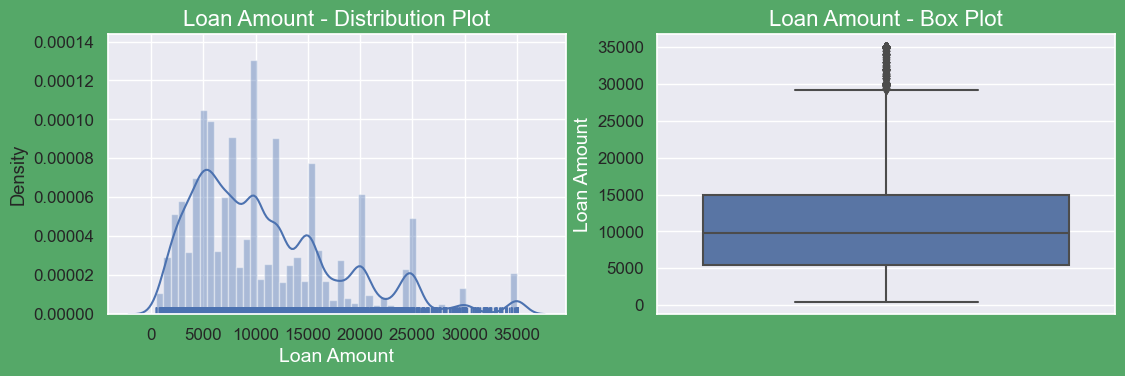

In [173]:
# univariate analysis on 5 important driver variables
# 1. Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(13,8),facecolor='g')
sns.set_style("darkgrid")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df1['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df1['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

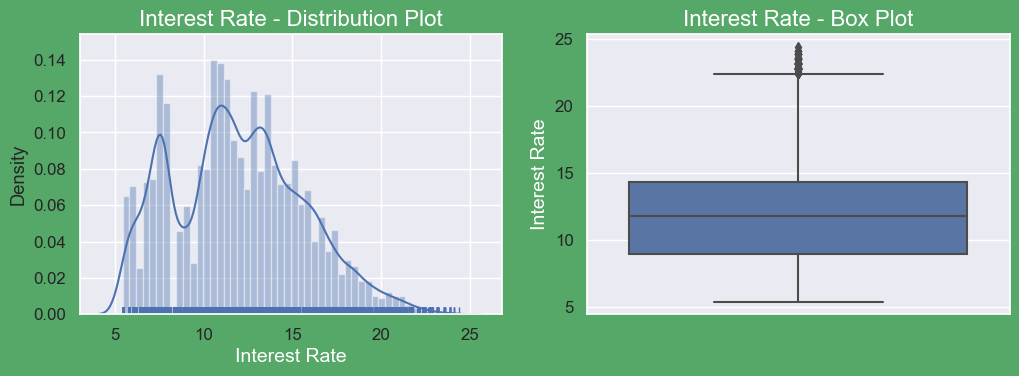

In [174]:
# 2. Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(12,8),facecolor='g')
sns.set_style("darkgrid")
# subplot 1
plt.subplot(2, 2, 1)

ax = sns.distplot(df1['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df1['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 9% - 14%

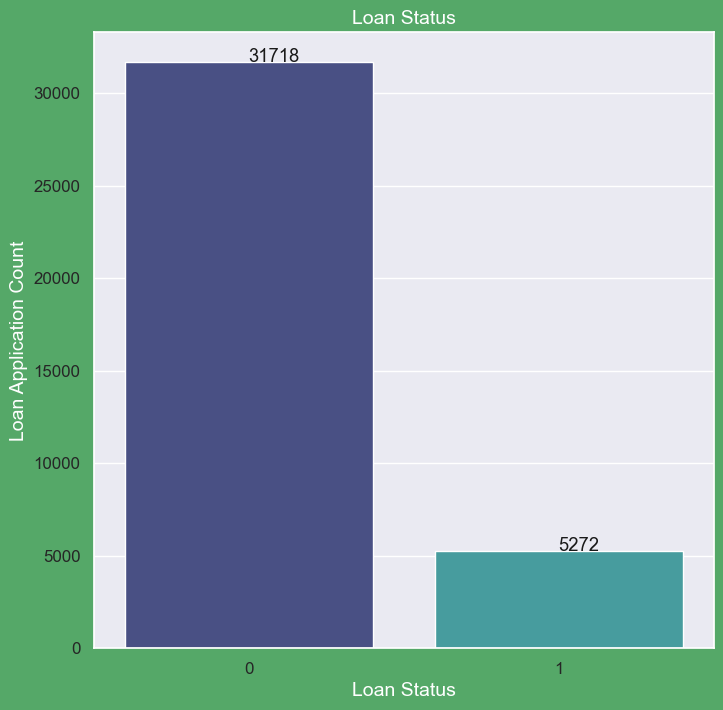

In [175]:
# 3 .Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(8,8),facecolor='g')
sns.set_style("darkgrid")
ax = sns.countplot(x="loan_status",data=df1,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=df1['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

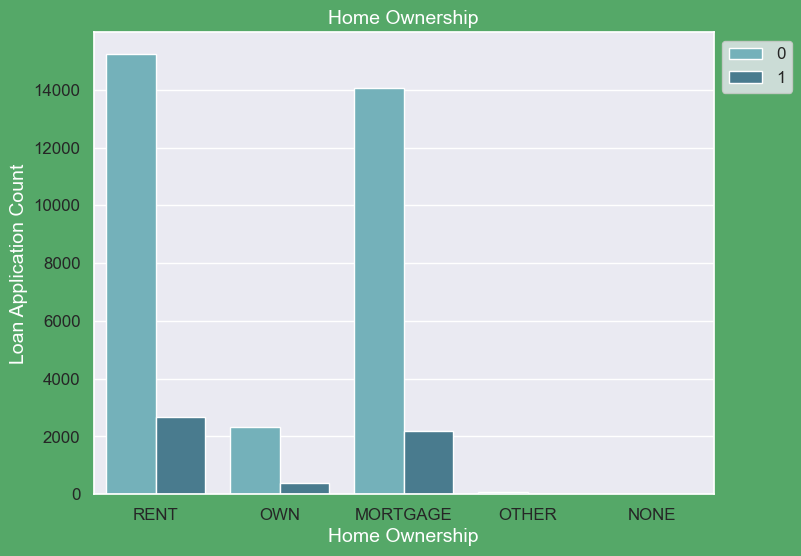

In [176]:
# 4.Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(8,6),facecolor='g')
ax = sns.countplot(x="home_ownership",data=df1,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   

plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.
# those who have own is very low 

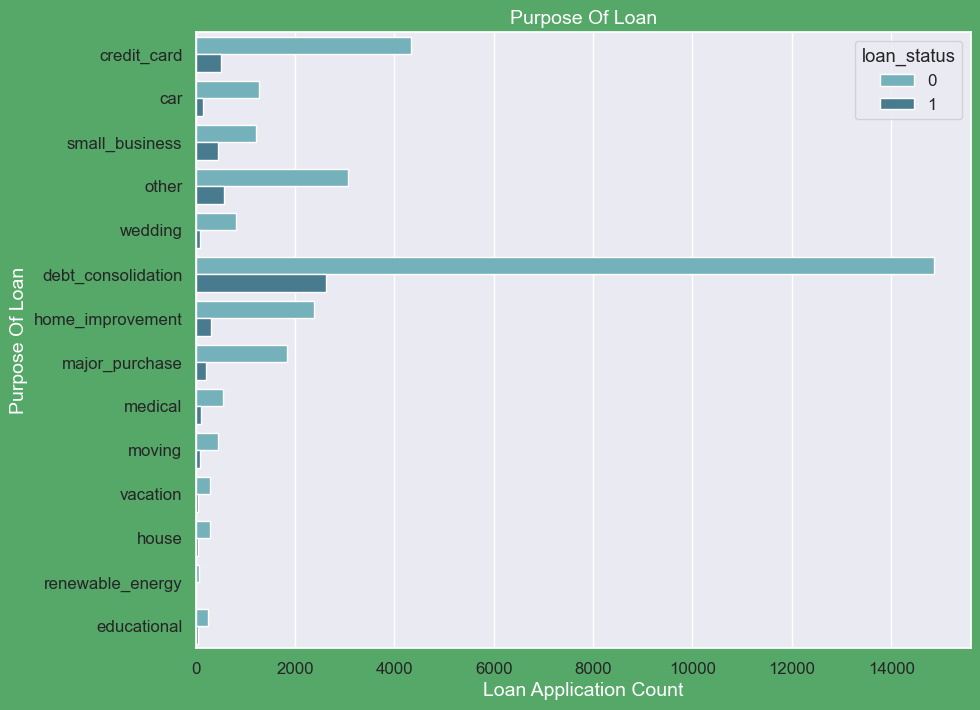

In [177]:
# 5. Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(10,8),facecolor='g')
sns.set_style("darkgrid")
ax = sns.countplot(y="purpose",data=df1,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# 1) Below plot shows that most of the loans were taken for debt consolidation and paying credit card bill.
# 2) Number of chraged off count also high too for these loans.

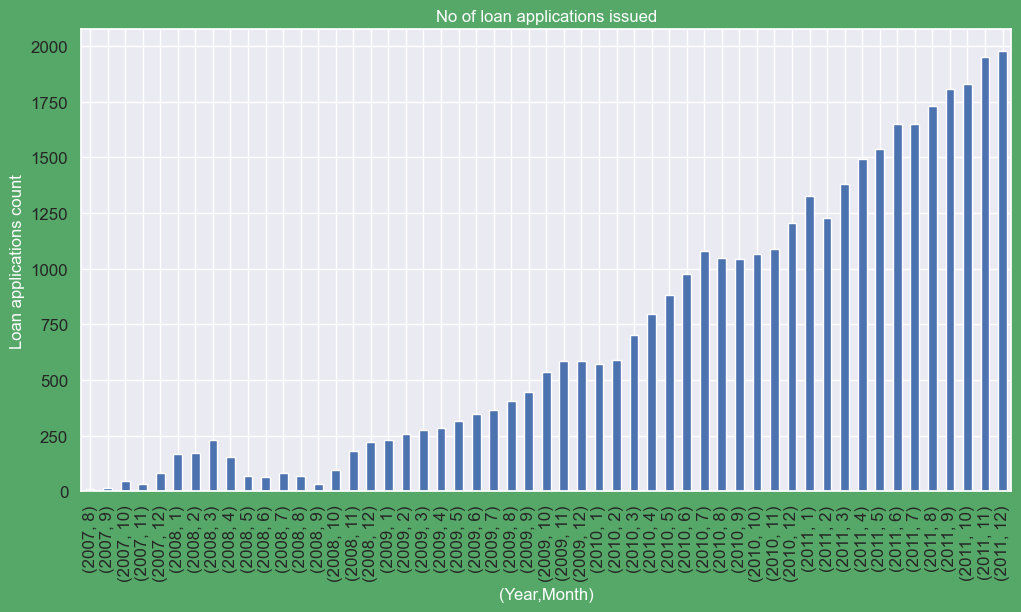

In [178]:
# Derived Column 
# looking  into number of loans which were approved every year/month
# derived column year and month to check pattern of loan issuing over the years.
plt.figure(figsize=(12,6),facecolor='g')
df1.groupby(['year','month']).id.count().plot(kind='bar')
plt.xlabel('(Year,Month)',fontsize=12,color = 'w')  
plt.ylabel('Loan applications count',fontsize=12,color='w')
    
plt.title("No of loan applications issued",fontsize=12,color='w')
plt.show()


# Observations:
# 1) count of loan application is increasing every passing year.
# 2) number of loans issued in 2008(May-October) got less due to Recession.

In [179]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = df1.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan[1] + grade_vs_loan[0] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan[1] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# 1)Grade "A" has very less chances of charged off.
# 2)Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status,grade,0,1,Total,Chargedoff_Proportion
6,G,190,94,284,0.330986
5,F,627,302,929,0.325081
4,E,1870,676,2546,0.265515
3,D,3825,1062,4887,0.217311
2,C,6287,1256,7543,0.166512
1,B,9906,1331,11237,0.118448
0,A,9013,551,9564,0.057612


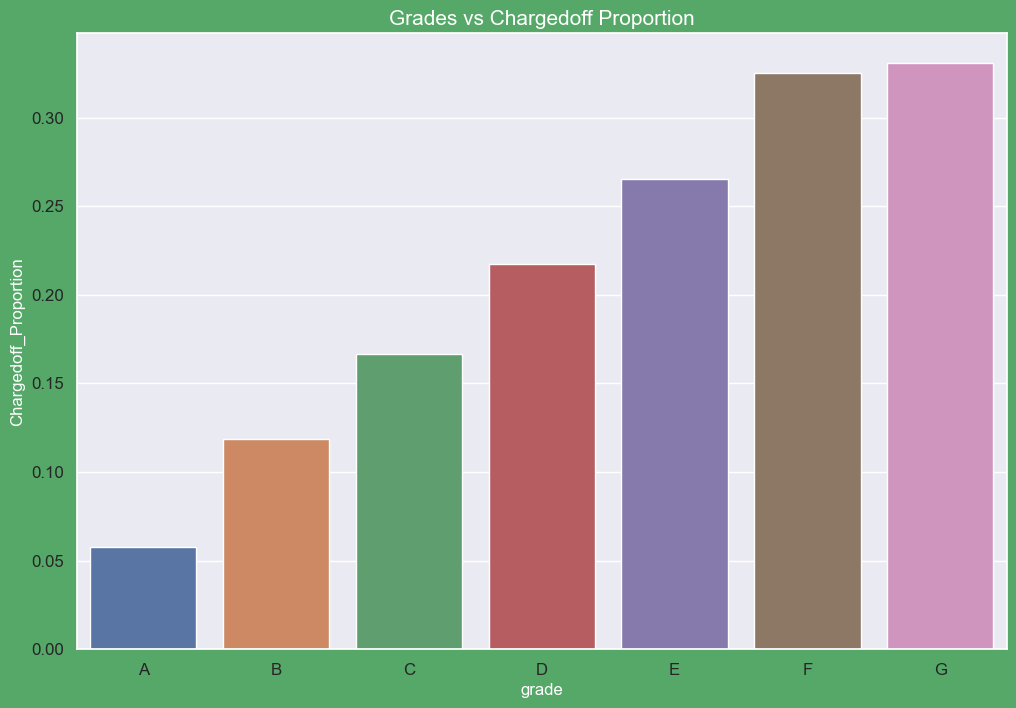

In [180]:
#barplots for above
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')

ax1.set_xlabel('Grades',fontsize=12,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color ='w')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')

ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)

plt.show()

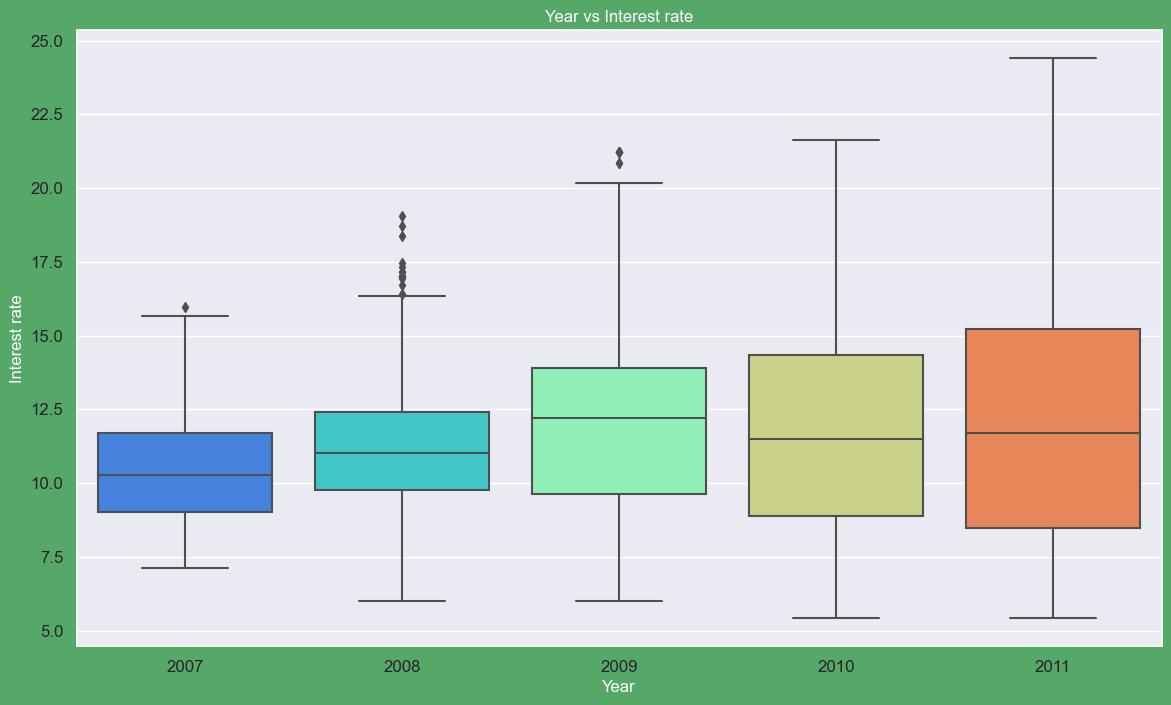

In [181]:
# dervied metrics and Bivariate Analysis - year vs Interest Rate

plt.figure(figsize=(14,8),facecolor='g')
ax = sns.boxplot(y='int_rate', x='year', data =df1,palette='rainbow')
ax.set_title('Year vs Interest rate',fontsize=12,color='w')
ax.set_ylabel('Interest rate',fontsize=12,color = 'w')
ax.set_xlabel('Year',fontsize=12,color = 'w')
plt.show()

# Observations:
#1)  intrest rate is increasing slowly with increase in year .